In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
import pymc3 as pm
import math

# Burkina Faso

In [2]:
# GBD Data
years = [1990, 2000, 2010, 2015, 2017, 2019]
cov_GBD = [0.88, 0.902, 0.886, 0.89, 0.885, 0.886]

In [3]:
# "World Health Statistics 2010" pages 88-89
# https://books.google.com/books?hl=en&lr=&id=Z69vxfRfFIsC&oi=fnd&pg=PA1&dq=%22vitamin+a+supplementation%22+%22burkina+faso%22+%22coverage%22&ots=cHOLbfNF9F&sig=zfUf5D9hJTE76T7FOkyiHlZ7uQo#v=onepage&q=vitamin%20a&f=false
year_WHO = [2008]
cov_WHO = [0.671]

# Independent Evaluation of the Rapid Scale-Up Program to Reduce Under-Five Mortality in Burkina Faso
# https://www.ajtmh.org/content/journals/10.4269/ajtmh.15-0585
year_Munos = [2010, 2013]
cov_Munos = [0.89, 0.93]

# Factors Affecting the Validity of Coverage Survey Reports of Receipt of Vitamin A Supplements During Child Health Days in Southwestern Burkina Faso
# https://journals.sagepub.com/doi/full/10.1177/0379572116666167
year_Ouedraogo = [2016]
cov_Ouedraogo_cross = [0.94]
cov_Ouedraogo_long = [0.82]

# Comparison of administrative and survey data for estimating vitamin A supplementation and deworming coverage of children under five years of age in Sub‐Saharan Africa
# https://onlinelibrary.wiley.com/doi/full/10.1111/tmi.12883
year_Janmohamed = [2011.6, 2012, 2012.3, 2012.6, 2013, 2013.3, 2013.6, 2014, 2014.3, 2014.6, 2014.9]
cov_Janmohamed = [0.937, 0.906, 0.868, 0.936, 0.872, 0.969, 0.87, 0.959, 0.934, 0.96, 0.96]

# Use of Administrative Data to EstimateMass Vaccination Campaign Coverage,Burkina Faso, 1999 
# https://academic.oup.com/jid/article/187/Supplement_1/S86/806268
year_Zuber = [1999]
cov_Zuber = [0.9]

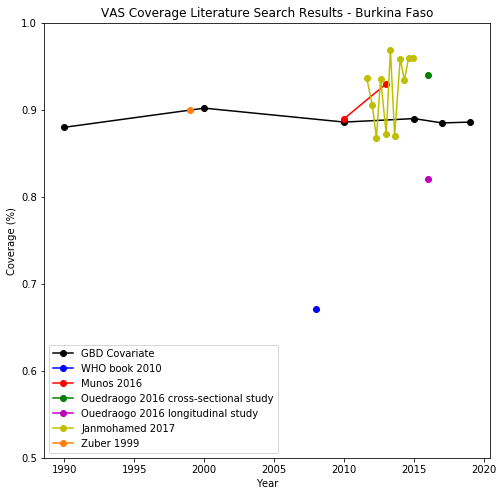

In [4]:
fig = plt.figure(figsize=(8, 8))
plt.plot(years, cov_GBD, label="GBD Covariate", c="k", linestyle = '-', marker = 'o')
plt.plot(year_WHO, cov_WHO, label="WHO book 2010", c="b", linestyle = '-', marker = 'o')
plt.plot(year_Munos, cov_Munos, label="Munos 2016", c="r", linestyle = '-', marker = 'o')
plt.plot(year_Ouedraogo, cov_Ouedraogo_cross, label="Ouedraogo 2016 cross-sectional study", c="g", linestyle = '-', marker = 'o')
plt.plot(year_Ouedraogo, cov_Ouedraogo_long, label="Ouedraogo 2016 longitudinal study", c="m", linestyle = '-', marker = 'o')
plt.plot(year_Janmohamed, cov_Janmohamed, label="Janmohamed 2017", c="y", linestyle = '-', marker = 'o')
plt.plot(year_Zuber, cov_Zuber, label="Zuber 1999", c="C1", linestyle = '-', marker = 'o')

plt.title("VAS Coverage Literature Search Results - Burkina Faso")
plt.xlabel("Year")
plt.ylabel("Coverage (%)")
plt.legend()

plt.ylim([0.5, 1])

plt.show()

# Nigeria

In [5]:
# GBD Data
years = [1990, 1995, 2000, 2005, 2010, 2017, 2019]
cov_GBD = [0.63, 0.635, 0.632, 0.633, 0.648, 0.635, 0.637]

In [25]:
# "World Health Statistics 2010" pages 88-89
# https://books.google.com/books?hl=en&lr=&id=Z69vxfRfFIsC&oi=fnd&pg=PA1&dq=%22vitamin+a+supplementation%22+%22burkina+faso%22+%22coverage%22&ots=cHOLbfNF9F&sig=zfUf5D9hJTE76T7FOkyiHlZ7uQo#v=onepage&q=vitamin%20a&f=false
year_WHO = [2008]
cov_WHO = [0.258]
# NO DATA

# https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-019-6413-1
# Inequitable coverage of vitamin A supplementation in Nigeria and implications for childhood blindness
year_Aghaji = [2019]
cov_Aghaji = [0.415]
# 24327 sample

# http://www.anmjournal.com/article.asp?issn=0331-3131;year=2016;volume=10;issue=1;spage=16;epage=23;aulast=Adamu
# Assessment of Vitamin A supplementation coverage and associated barriers in Sokoto State, Nigeria
year_Adamu = [2016]
cov_Adamu_single = [0.616]
cov_Adamu_double = [0.416]
# 900 sample

# https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(06)69339-2/fulltext
# Countdown to 2015: tracking intervention coverage for child survival
year_Bryce = [2006]
cov_Bryce = [0.27]
# NO DATA

# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5763688/pdf/TSWJ-2010-10-452878.pdf
# Childhood vitamin A capsule supplementation coverage in Nigeria: a multilevel analysis of geographic and socioeconomic inequities.
year_Aremu = [2008]
cov_Aremu = [0.199]
# 19555 sample

# DHS Data
year_DHS = [2003, 2009, 2013]
cov_DHS = [0.337, 0.25, 0.41]
# 4682 (2003), 22099 (2009), 25961 (2013)

# https://www.cambridge.org/core/services/aop-cambridge-core/content/view/D4BC7F0D8035CED0AB3C1FB54DCA67AC/S1368980017000684a.pdf/determinants_of_successful_vitamin_a_supplementation_coverage_among_children_aged_659_months_in_thirteen_subsaharan_african_countries.pdf
# Determinants of successful vitamin A supplementation coverage among children aged 6–59 months in thirteen sub-Saharan African countries
year_Janmohamed = [2013, 2014, 2015]
cov_Janmohamed = [0.478, 0.566, 0.55]
# 1775 (2013), 896 (2014), 1778 (2015)

years_all = np.array([2003, 2006, 2008, 2008, 2009, 2013, 2013, 2014, 2015, 2016, 2019])
cov_all = np.array([0.337, 0.27, 0.199, 0.258, 0.25, 0.41, 0.478, 0.566, 0.55, 0.416, 0.415])
cov_size = np.array([4682, np.nan, 19555, np.nan, 22099, 25961, 1775, 895, 1778, 900, 24327])

In [30]:
cov_size[1], cov_size[3] = 895, 895 # assigning missing values to lowest size
print(cov_size)

cov_std = np.sqrt(cov_all * (1 - cov_all)/cov_size)
print(cov_std)

[ 4682.   895. 19555.   895. 22099. 25961.  1775.   895.  1778.   900.
 24327.]
[0.00690806 0.01483993 0.00285505 0.01462515 0.00291282 0.00305251
 0.01185632 0.01656691 0.01179836 0.01642978 0.00315906]


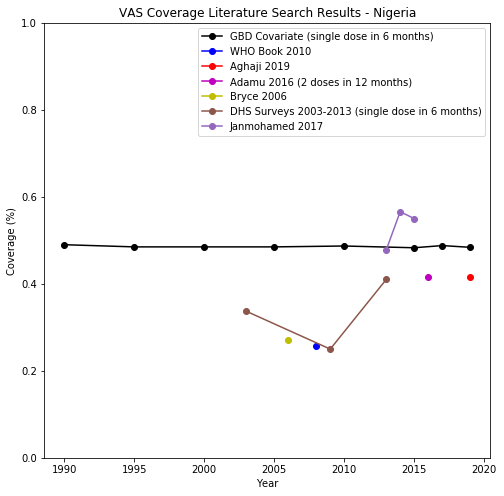

In [31]:
fig = plt.figure(figsize=(8, 8))
plt.plot(years, cov_GBD, label="GBD Covariate (single dose in 6 months)", c="k", linestyle = '-', marker = 'o')
plt.plot(year_WHO, cov_WHO, label="WHO Book 2010", c="b", linestyle = '-', marker = 'o')
plt.plot(year_Aghaji, cov_Aghaji, label="Aghaji 2019", c="r", linestyle = '-', marker = 'o')
# plt.plot(year_Adamu, cov_Adamu_single, label="Adamu 2016 (1 dose in 12 months)", c="g", linestyle = '-', marker = 'o')
plt.plot(year_Adamu, cov_Adamu_double, label="Adamu 2016 (2 doses in 12 months)", c="m", linestyle = '-', marker = 'o')
plt.plot(year_Bryce, cov_Bryce, label="Bryce 2006", c="y", linestyle = '-', marker = 'o')
# plt.plot(year_Aremu, cov_Aremu, label="Aremu 2010 (12-59 months only)", c="C1", linestyle = '-', marker = 'o')
plt.plot(year_DHS, cov_DHS, label="DHS Surveys 2003-2013 (single dose in 6 months)", c="C5", linestyle = '-', marker = 'o')
plt.plot(year_Janmohamed, cov_Janmohamed, label="Janmohamed 2017", c="C4", linestyle = '-', marker = 'o')

plt.title("VAS Coverage Literature Search Results - Nigeria")
plt.xlabel("Year")
plt.ylabel("Coverage (%)")
plt.legend()

plt.ylim([0, 1])

plt.show()

## PyMC3 Analysis

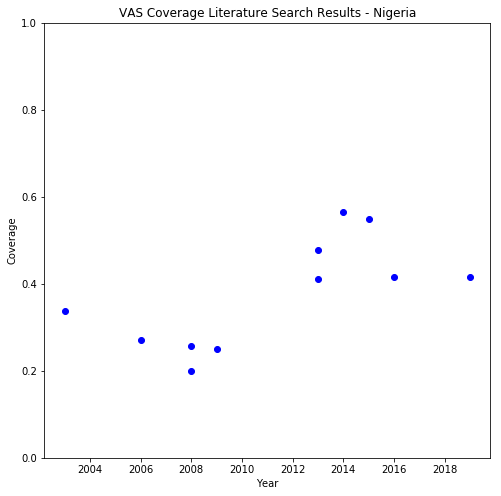

In [32]:
cov_all = pd.Series(cov_all)
years_all = pd.Series(years_all)

fig = plt.figure(figsize=(8, 8))
plt.scatter(years_all, cov_all, c="b", marker = 'o')

plt.title("VAS Coverage Literature Search Results - Nigeria")
plt.xlabel("Year")
plt.ylabel("Coverage")

plt.ylim([0, 1])

plt.show()

In [9]:
# with pm.Model() as coverage_model:
    
#     switchpoint = pm.Uniform('switchpoint', lower=years_all.min(), upper=years_all.max())
    
#     early_rate = pm.Exponential('early_rate', 0.3)
#     late_rate = pm.Exponential('late_rate', 0.3)
    
#     rate = pm.math.switch(switchpoint >= years_all, early_rate, late_rate)
        
#     cov = pm.Normal("cov", mu=rate, sigma=.01, observed=cov_all)

In [33]:
with pm.Model() as coverage_model:
    
    rate = pm.Exponential('rate', 0.3)
    
    cov = pm.Normal("cov", mu=rate, sigma=cov_std, observed=cov_all)

In [34]:
with coverage_model:
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [rate]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:08<00:00, 681.16draws/s]
The acceptance probability does not match the target. It is 0.8889101768580853, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9682347685191159, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8904678037252535, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.905915292403079, but should be close to 0.8. Try to increase the number of tuning steps.


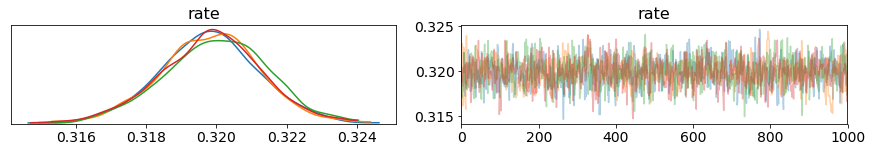

In [35]:
pm.traceplot(trace);

[0.31986279 0.31986279 0.31986279 0.31986279 0.31986279 0.31986279
 0.31986279 0.31986279 0.31986279 0.31986279 0.31986279]


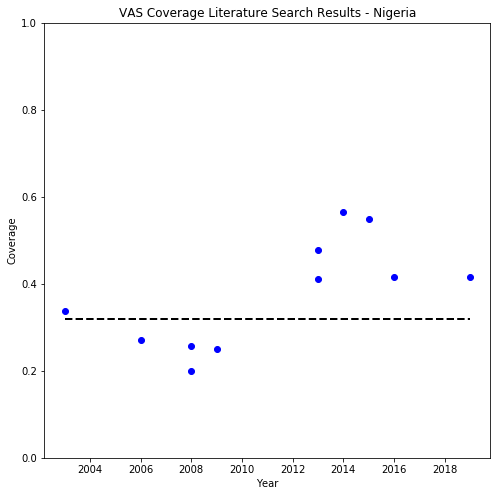

In [36]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(years_all, cov_all, c="b", marker = 'o')

plt.title("VAS Coverage Literature Search Results - Nigeria")
plt.xlabel("Year")
plt.ylabel("Coverage")

plt.ylim([0, 1])


# plt.vlines(trace['switchpoint'].mean(), cov_all.min(), cov_all.max(), color="C1")
average_coverage = np.zeros_like(cov_all, dtype='float')
for i, year in enumerate(years_all):
    average_coverage[i] = trace['rate'].mean()
# for i, year in enumerate(years_all):
#     idx = year < trace['switchpoint']
#     average_coverage[i] = (trace['early_rate'][idx].sum() + trace['late_rate'][~idx].sum()) / (len(trace) * trace.nchains)
    
# sp_hpd = pm.hpd(trace['switchpoint'])
# plt.fill_betweenx(y=[cov_all.min(), cov_all.max()], x1=sp_hpd[0], x2=sp_hpd[1], alpha=0.5, color='C1')
plt.plot(years_all, average_coverage,  'k--', lw=2)

print(average_coverage)

# Kenya

In [2]:
# GBD Data
years = [1990, 1995, 2000, 2005, 2010, 2015, 2017, 2019]
cov_GBD = [0.49, 0.485, 0.485, 0.485, 0.487, 0.483, 0.488, 0.484]

In [5]:
# "World Health Statistics 2010" pages 88-89
# https://books.google.com/books?hl=en&lr=&id=Z69vxfRfFIsC&oi=fnd&pg=PA1&dq=%22vitamin+a+supplementation%22+%22burkina+faso%22+%22coverage%22&ots=cHOLbfNF9F&sig=zfUf5D9hJTE76T7FOkyiHlZ7uQo#v=onepage&q=vitamin%20a&f=false
year_WHO = [2008]
cov_WHO = [0.333]
# NO DATA

# https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(06)69339-2/fulltext
# Countdown to 2015: tracking intervention coverage for child survival
year_Bryce = [2006]
cov_Bryce = [0.33]
# NO DATA

# https://www.ncbi.nlm.nih.gov/pubmed/25107652
# Coverage of vitamin A supplementation and deworming during Malezi Bora in Kenya.
year_Clohessy = [2012]
cov_Clohessy = [0.31]
cov_Clohessy_6_11 = [0.457]
cov_Clohessy_12_59 = [0.288]
# 888 sample

# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6570821/
# Programmatic implications of some vitamin A supplementation and deworming determinants among children aged 6-59 months in resource-poor rural Kenya
year_Oiye = [2016]
cov_Oiye = [0.449]
# 1177 sample

# DHS Data
year_DHS = [2003, 2009, 2014]
cov_DHS = [0.33, 0.3, 0.72]
# 4941 (2003), 4946 (2009), 17007 (2014)

# https://www.cambridge.org/core/services/aop-cambridge-core/content/view/D4BC7F0D8035CED0AB3C1FB54DCA67AC/S1368980017000684a.pdf/determinants_of_successful_vitamin_a_supplementation_coverage_among_children_aged_659_months_in_thirteen_subsaharan_african_countries.pdf
# Determinants of successful vitamin A supplementation coverage among children aged 6–59 months in thirteen sub-Saharan African countries
year_Janmohamed = [2012, 2013]
cov_Janmohamed = [0.309, 0.583]
# 886 (2012), 889 (2013)

years_all = np.array([2003, 2006, 2008, 2009, 2012, 2012, 2013, 2014, 2016])
cov_all = np.array([0.33, 0.33, 0.333, 0.3, 0.31, 0.309, 0.583, 0.72, 0.449])
cov_size = np.array([4941, np.nan, np.nan, 4946, 888, 886, 889, 17007, 1177])

In [6]:
cov_size[1], cov_size[2] = 886, 886 # assigning missing values to lowest size
print(cov_size)

cov_std = np.sqrt(cov_all * (1 - cov_all)/cov_size)
print(cov_std)

[ 4941.   886.   886.  4946.   888.   886.   889. 17007.  1177.]
[0.0066894  0.01579711 0.01583318 0.00651602 0.01552026 0.01552392
 0.0165368  0.00344296 0.01449809]


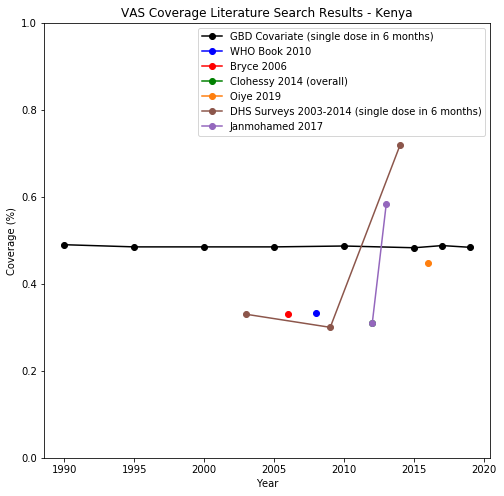

In [7]:
fig = plt.figure(figsize=(8, 8))
plt.plot(years, cov_GBD, label="GBD Covariate (single dose in 6 months)", c="k", linestyle = '-', marker = 'o')
plt.plot(year_WHO, cov_WHO, label="WHO Book 2010", c="b", linestyle = '-', marker = 'o')
plt.plot(year_Bryce, cov_Bryce, label="Bryce 2006", c="r", linestyle = '-', marker = 'o')
plt.plot(year_Clohessy, cov_Clohessy, label="Clohessy 2014 (overall)", c="g", linestyle = '-', marker = 'o')
# plt.plot(year_Clohessy, cov_Clohessy_6_11, label="Clohessy 2014 (6-11 months)", c="m", linestyle = '-', marker = 'o')
# plt.plot(year_Clohessy, cov_Clohessy_12_59, label="Clohessy 2014 (12-59 months)", c="y", linestyle = '-', marker = 'o')
plt.plot(year_Oiye, cov_Oiye, label="Oiye 2019", c="C1", linestyle = '-', marker = 'o')
plt.plot(year_DHS, cov_DHS, label="DHS Surveys 2003-2014 (single dose in 6 months)", c="C5", linestyle = '-', marker = 'o')
plt.plot(year_Janmohamed, cov_Janmohamed, label="Janmohamed 2017", c="C4", linestyle = '-', marker = 'o')

plt.title("VAS Coverage Literature Search Results - Kenya")
plt.xlabel("Year")
plt.ylabel("Coverage (%)")
plt.legend()

plt.ylim([0, 1])

plt.show()

## PyMC3 Analysis

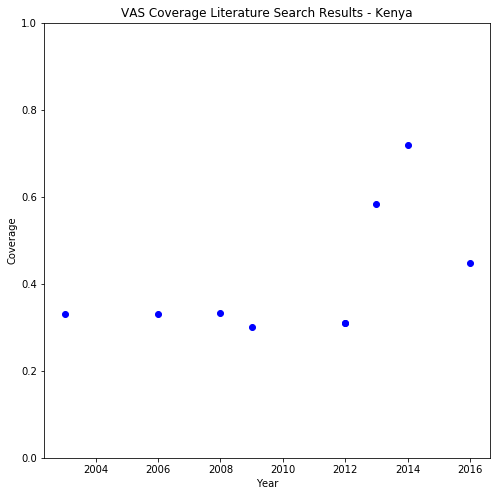

In [8]:
cov_all = pd.Series(cov_all)
years_all = pd.Series(years_all)

fig = plt.figure(figsize=(8, 8))
plt.scatter(years_all, cov_all, c="b", marker = 'o')

plt.title("VAS Coverage Literature Search Results - Kenya")
plt.xlabel("Year")
plt.ylabel("Coverage")

plt.ylim([0, 1])

plt.show()

In [9]:
# with pm.Model() as coverage_model:
    
#     switchpoint = pm.Uniform('switchpoint', lower=years_all.min(), upper=years_all.max())
    
#     early_rate = pm.Exponential('early_rate', 0.3)
#     late_rate = pm.Exponential('late_rate', 0.3)
    
#     rate = pm.math.switch(switchpoint >= years_all, early_rate, late_rate)
    
#     cov = pm.Normal("cov", mu=rate, sigma=.01, observed=cov_all)

In [10]:
with pm.Model() as coverage_model:
    
    rate = pm.Exponential('rate', 0.3)
    
    cov = pm.Normal("cov", mu=rate, sigma=cov_std, observed=cov_all)

In [11]:
with coverage_model:
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [rate]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:06<00:00, 956.05draws/s] 
The acceptance probability does not match the target. It is 0.9049091070420927, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8962483375967999, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8873980850644188, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.901371684783157, but should be close to 0.8. Try to increase the number of tuning steps.


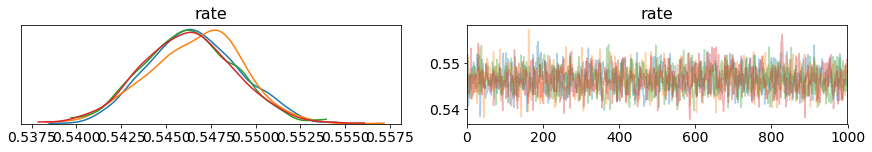

In [12]:
pm.traceplot(trace);

[0.54644256 0.54644256 0.54644256 0.54644256 0.54644256 0.54644256
 0.54644256 0.54644256 0.54644256]


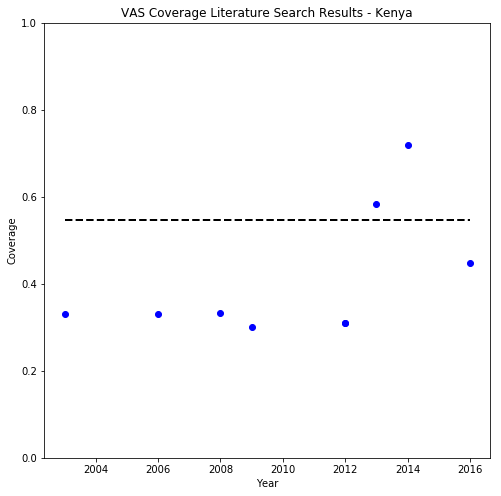

In [13]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(years_all, cov_all, c="b", marker = 'o')

plt.title("VAS Coverage Literature Search Results - Kenya")
plt.xlabel("Year")
plt.ylabel("Coverage")

plt.ylim([0, 1])

average_coverage = np.zeros_like(cov_all, dtype='float')

for i, year in enumerate(years_all):
    average_coverage[i] = trace['rate'].mean()
    
# plt.vlines(trace['switchpoint'].mean(), cov_all.min(), cov_all.max(), color="C1")
# for i, year in enumerate(years_all):
#     idx = year < trace['switchpoint']
#     average_coverage[i] = (trace['early_rate'][idx].sum() + trace['late_rate'][~idx].sum()) / (len(trace) * trace.nchains)
    
# sp_hpd = pm.hpd(trace['switchpoint'])
# plt.fill_betweenx(y=[cov_all.min(), cov_all.max()], x1=sp_hpd[0], x2=sp_hpd[1], alpha=0.5, color='C1')

plt.plot(years_all, average_coverage,  'k--', lw=2)

print(average_coverage)